In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
df=pd.read_csv("D:\\down\\mobile_addiction.csv")

In [3]:
df.shape

(13589, 12)

In [4]:
df.head(10)

Unnamed: 0  daily_screen_time  app_sessions  social_media_usage  \
0           0                  2            29                   0   
1           1                  6            29                   1   
2           2                  9            28                   2   
3           3                  6            39                   2   
4           4                  5            37                   3   
5           5                  4            29                   0   
6           6                  4            32                   0   
7           7                  7            37                   4   
8           8                  5            29                   3   
9           9                  0            22                   2   

   gaming_time  notifications  night_usage  age  work_study_hours  \
0            0             49            0   44                 5   
1            2             65            1   29                 5   
2            0             57            3   28                 7   
3            0             69            1   28                 6   
4            1             64            2   27                 4   
5            0             59            1   42                 6   
6            3             63            2   41                 2   
7            1             63            1   21                 7   
8            3             83            1   15                 7   
9            0             51            0   32                 6   

   stress_level  apps_installed      addicted  
0             3              35  not addicted  
1             9              21      addicted  
2             5              39      addicted  
3             8              24      addicted  
4             5              26      addicted  
5             5              22  not addicted  
6             4              30      addicted  
7             5              33      addicted  
8             4              29      addicted  
9             5              28  not addicted

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13589 entries, 0 to 13588
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          13589 non-null  int64 
 1   daily_screen_time   13589 non-null  int64 
 2   app_sessions        13589 non-null  int64 
 3   social_media_usage  13589 non-null  int64 
 4   gaming_time         13589 non-null  int64 
 5   notifications       13589 non-null  int64 
 6   night_usage         13589 non-null  int64 
 7   age                 13589 non-null  int64 
 8   work_study_hours    13589 non-null  int64 
 9   stress_level        13589 non-null  int64 
 10  apps_installed      13589 non-null  int64 
 11  addicted            13589 non-null  object
dtypes: int64(11), object(1)
memory usage: 1.2+ MB


In [6]:
df = df.drop(df.columns[0], axis=1) # remove id column 

In [7]:
df.describe()

daily_screen_time  app_sessions  social_media_usage   gaming_time  \
count       13589.000000  13589.000000        13589.000000  13589.000000   
mean            3.768121     30.037604            1.545956      1.034219   
std             1.897280      7.406585            1.204830      0.993172   
min             0.000000      8.000000            0.000000      0.000000   
25%             2.000000     25.000000            1.000000      0.000000   
50%             4.000000     30.000000            1.000000      1.000000   
75%             5.000000     35.000000            2.000000      2.000000   
max            12.000000     60.000000            7.000000      6.000000   

       notifications   night_usage           age  work_study_hours  \
count   13589.000000  13589.000000  13589.000000       13589.00000   
mean       60.015306      0.990213     33.055707           5.97807   
std        12.732064      0.946606     10.118145           2.07139   
min        25.000000      0.000000     15.000000           0.00000   
25%        50.000000      0.000000     25.000000           5.00000   
50%        59.000000      1.000000     33.000000           6.00000   
75%        70.000000      2.000000     41.000000           7.00000   
max       103.000000      6.000000     55.000000          14.00000   

       stress_level  apps_installed  
count  13589.000000    13589.000000  
mean       4.265288       27.532048  
std        2.288454        5.894790  
min        0.000000       10.000000  
25%        3.000000       23.000000  
50%        4.000000       27.000000  
75%        6.000000       31.000000  
max       10.000000       55.000000

In [8]:
df.isnull().sum()

daily_screen_time     0
app_sessions          0
social_media_usage    0
gaming_time           0
notifications         0
night_usage           0
age                   0
work_study_hours      0
stress_level          0
apps_installed        0
addicted              0
dtype: int64

### Data Visualisation

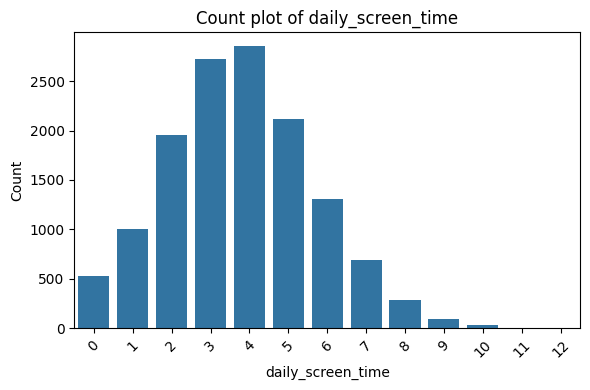

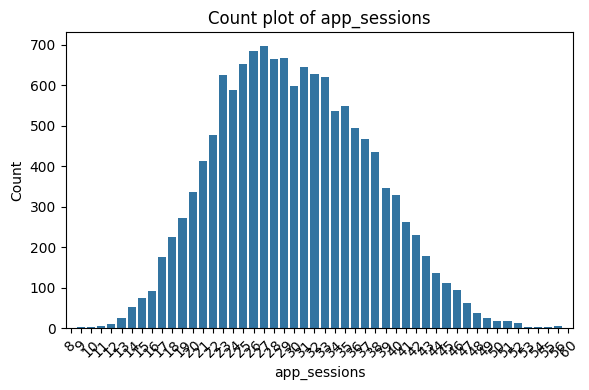

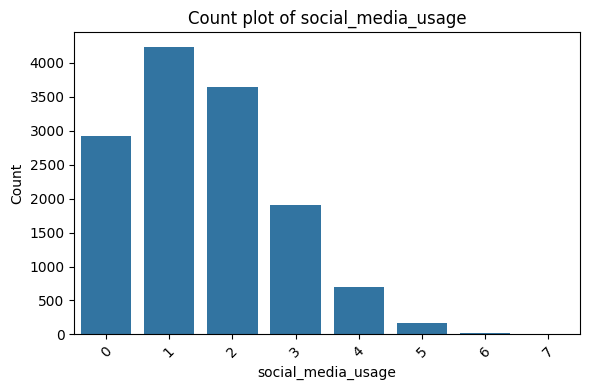

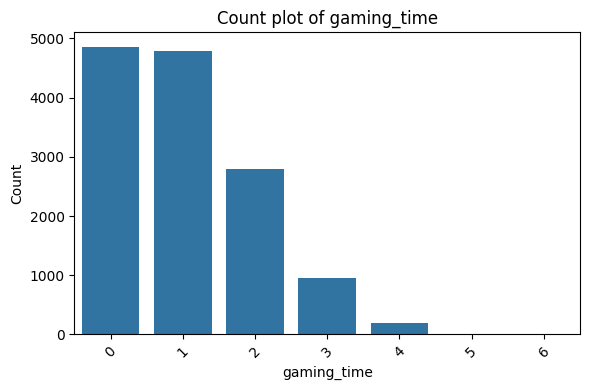

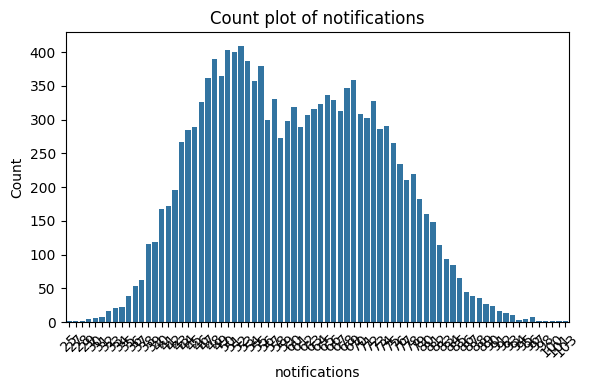

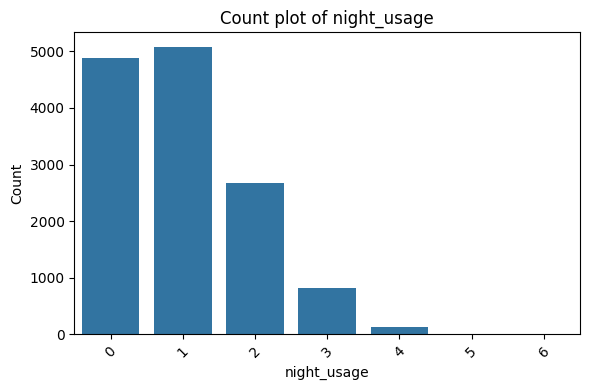

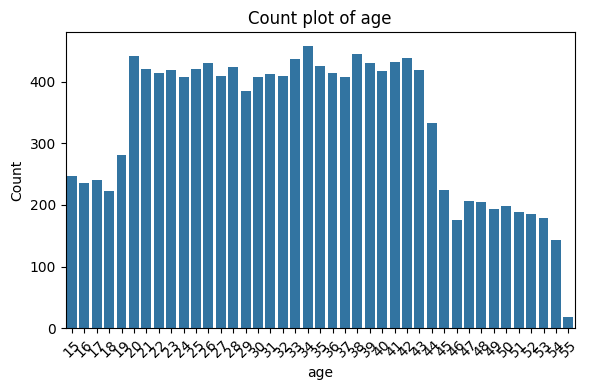

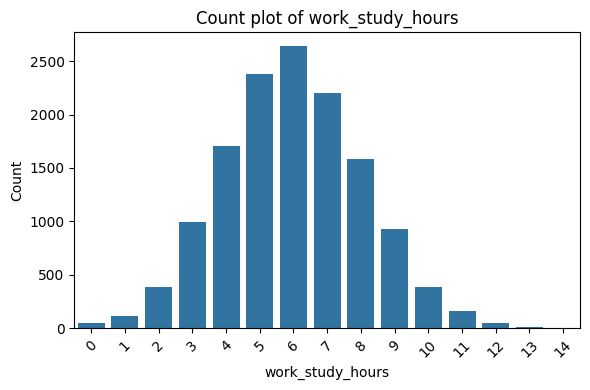

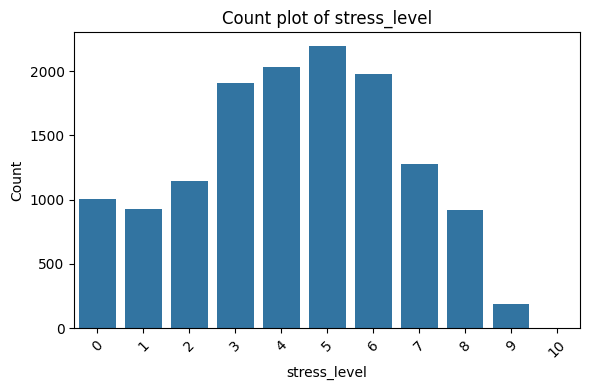

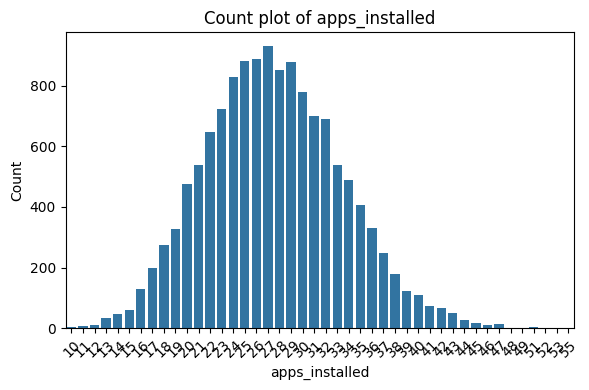

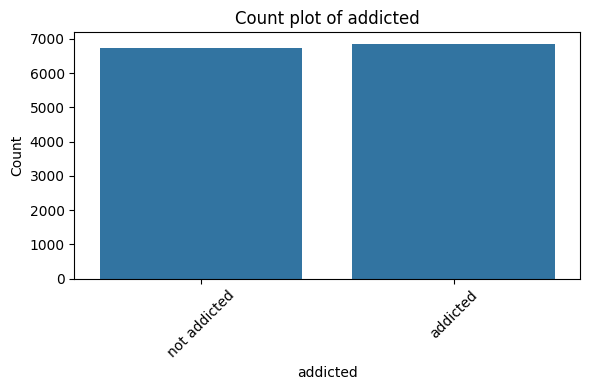

In [9]:
for col in df.columns:
    plt.figure(figsize=(6,4))
    sns.countplot(x=df[col])
    plt.title(f'Count plot of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# We can see most of the features are closly normally distributed. We can also see that the 2 classes (not addicted and addicted) are balanced.


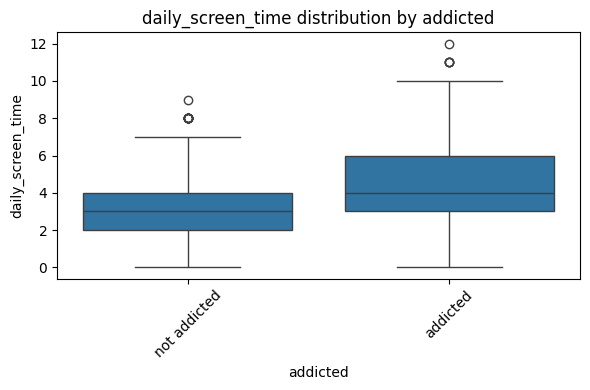

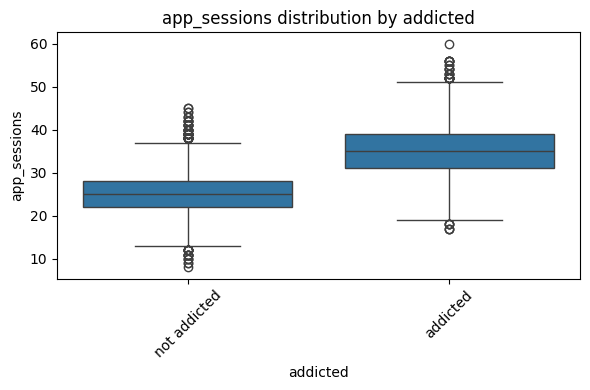

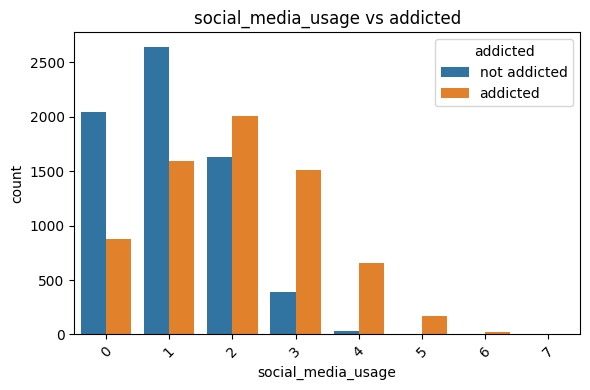

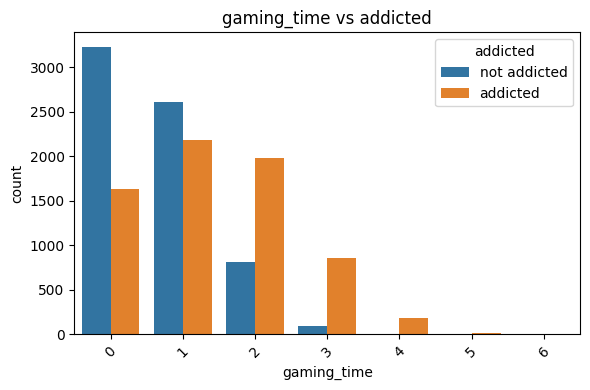

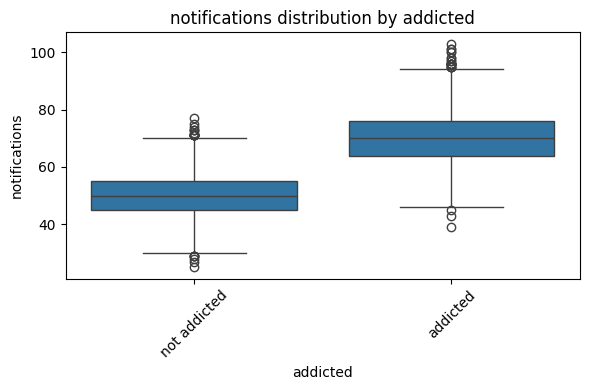

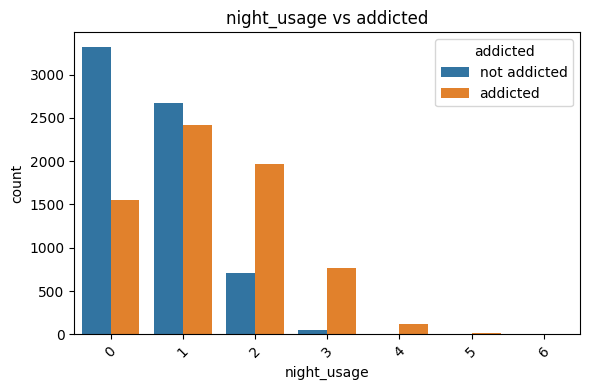

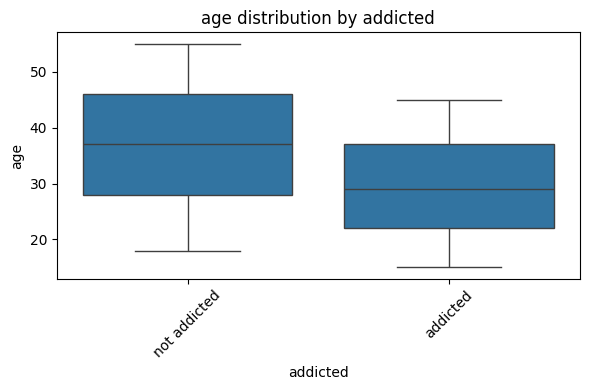

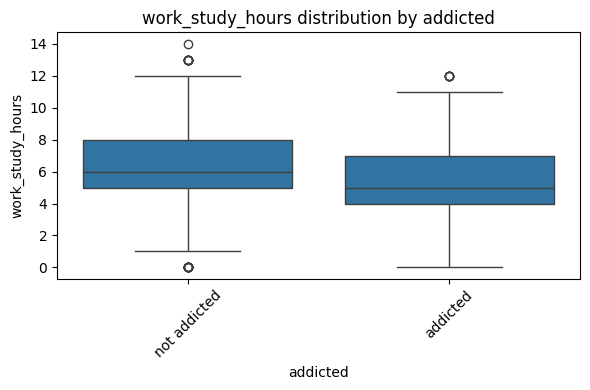

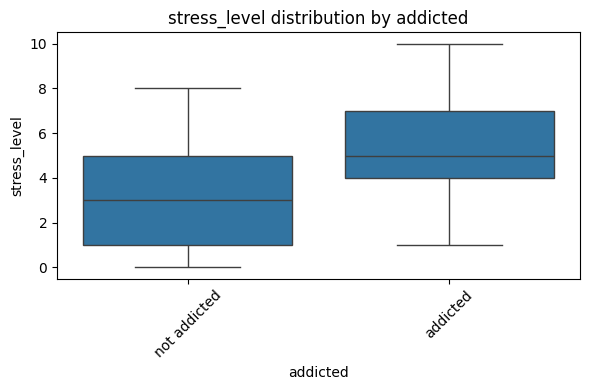

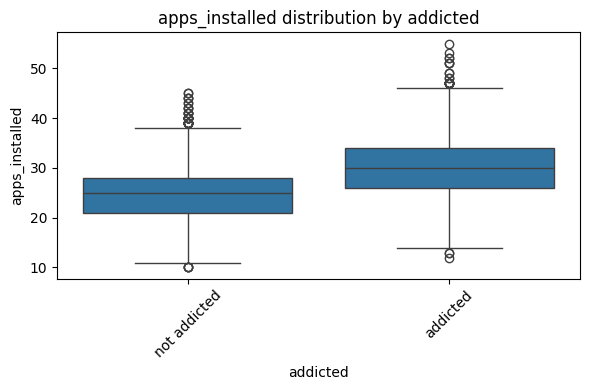

In [10]:
pred='addicted'
for col in df.columns:
    if col == pred:
        continue  # Skip predictor itself

    plt.figure(figsize=(6,4))

    if df[col].dtype == 'object' or df[col].nunique() < 10:
        # Categorical feature
        sns.countplot(x=col, hue=pred, data=df)
        plt.title(f'{col} vs {pred}')
    else:
        # Numerical feature
        sns.boxplot(x=pred, y=col, data=df)
        plt.title(f'{col} distribution by {pred}')

    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

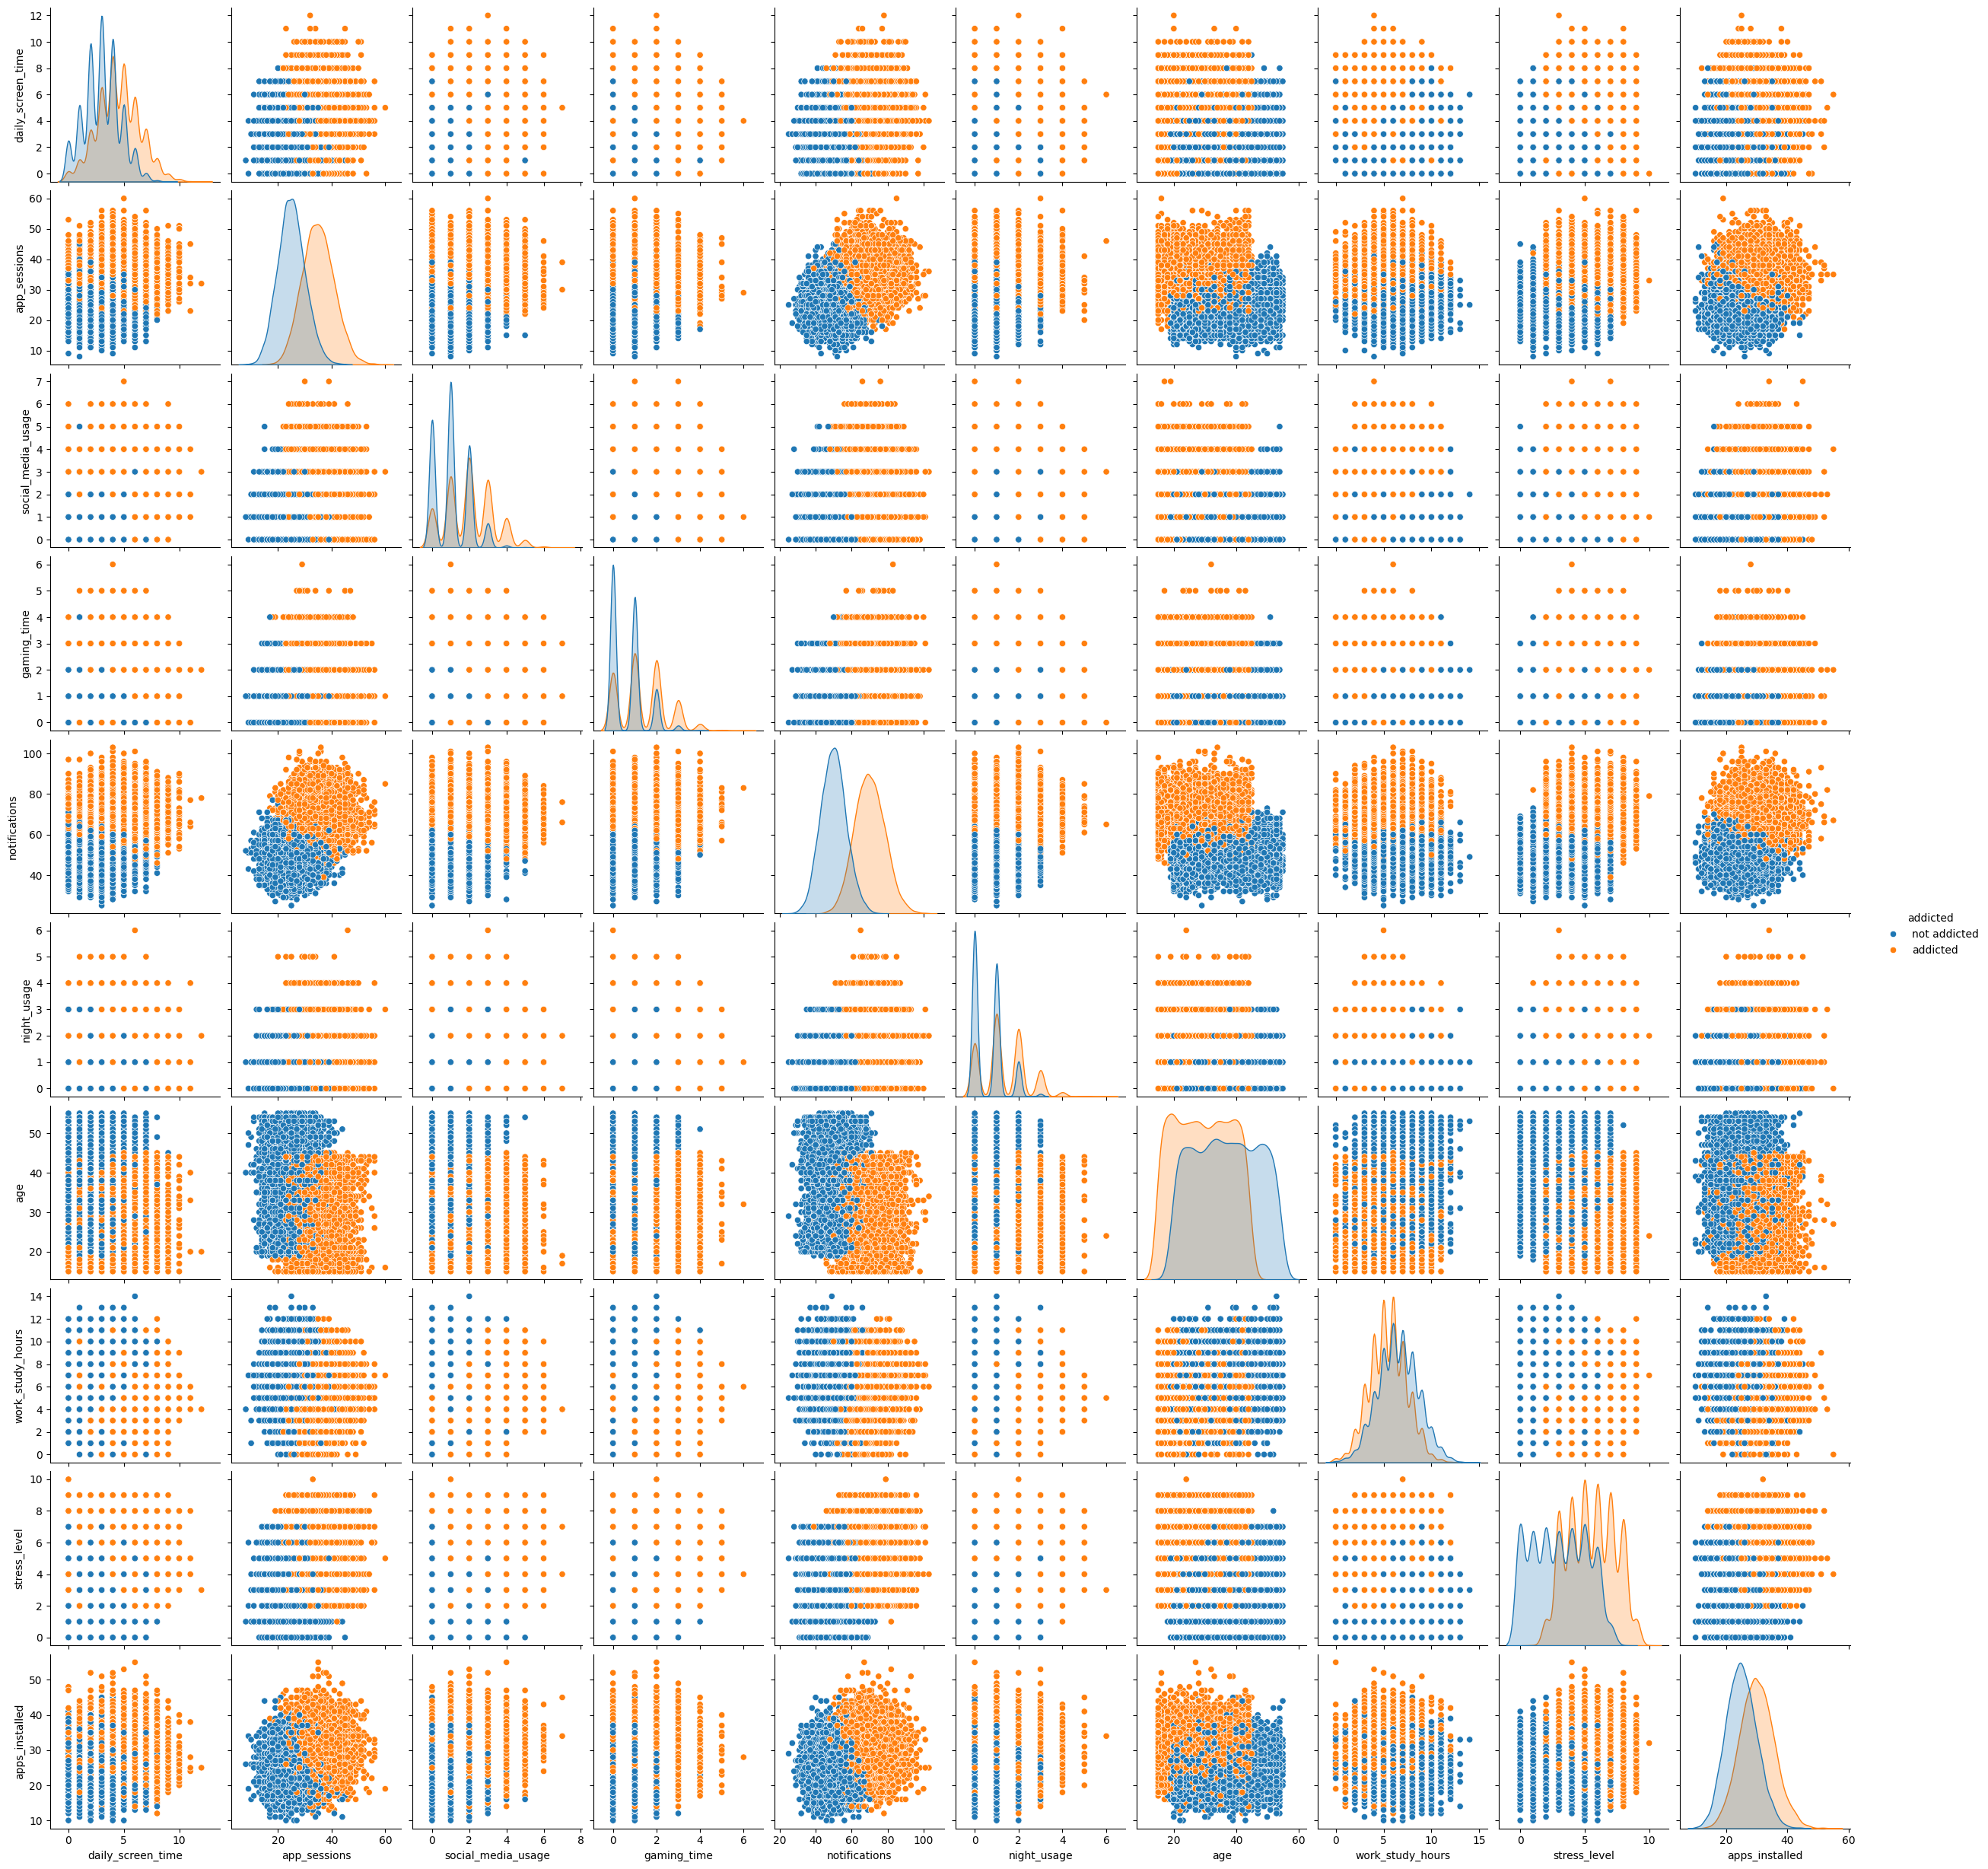

In [11]:
sns.pairplot(df, hue='addicted')
plt.show()

In [12]:
import dash
from dash import dcc, html

app = dash.Dash(__name__)


app.layout = html.Div([
    html.H1("Addiction Classification Dashboard"),
    
    dcc.Graph(
        id='scatter-night-vs-stress',
        figure=px.scatter(df, x='night_usage', y='stress_level', color='addicted', title='Night Usage vs Stress Level')
    ),
    
    dcc.Graph(
        id='box-night-usage',
        figure=px.box(df, x='addicted', y='night_usage', title='Night Usage Distribution by Addiction')
    ),
    
    dcc.Graph(
        id='hist-age',
        figure=px.histogram(df, x='age', color='addicted', barmode='overlay', title='Age Distribution')
    )
])

if __name__ == '__main__':
    app.run_server(debug=True)


In [13]:
dfcopy = df.copy()
dfcopy['addicted'] = pd.to_numeric(dfcopy['addicted'], errors='coerce')


dimensions = [col for col in dfcopy.columns if col != 'addicted']

fig = px.parallel_coordinates(dfcopy, color='addicted',
                              dimensions=dimensions,
                              color_continuous_scale=px.colors.diverging.Tealrose)
fig.show()


In [14]:
fig = px.histogram(df, x='age', color='addicted', marginal="box", nbins=20,
                   title='Interactive Age Distribution')
fig.update_layout(bargap=0.2)
fig.show()

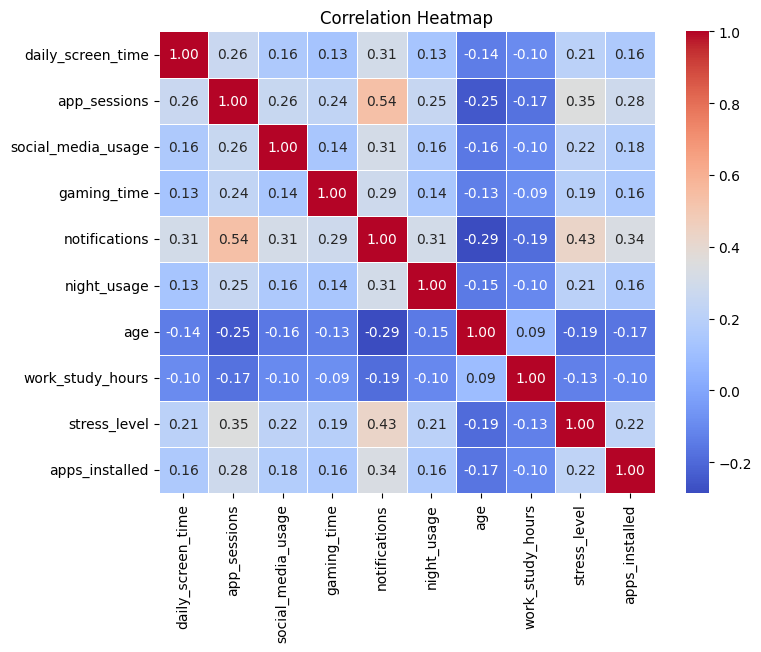

In [15]:
numerical_df = df.select_dtypes(include='number')
corr = numerical_df = df.select_dtypes(include='number').corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

In [16]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant


# Assume your dataset is a pandas DataFrame called "X" (features only, no target column)

# 1. Add a constant (intercept term)
dfcopy = df.drop('addicted', axis=1)
df_with_const=add_constant(dfcopy)

# 2. Calculate VIF for each feature
vif_data = pd.DataFrame()
#for feature in dfcopy.columns:
vif_data['feature'] = df_with_const.columns
vif_data['VIF'] = [variance_inflation_factor(df_with_const.values, i) for i in range(df_with_const.shape[1])]
print(vif_data)


               feature        VIF
0                const  80.073365
1    daily_screen_time   1.133709
2         app_sessions   1.524464
3   social_media_usage   1.142742
4          gaming_time   1.112887
5        notifications   1.797561
6          night_usage   1.133358
7                  age   1.122448
8     work_study_hours   1.050718
9         stress_level   1.291816
10      apps_installed   1.166692


few features and low corrineality, no PCA is needed.
1<VIF<5 ---> low to moderate corrineality 

In [17]:

for column in df.select_dtypes(include=['number']).columns:
	fig = px.box(df, x=column, title= f'Box plot for {column}')
	fig.show()

Only a few outlier points but we currently choose not to remove them as they are meaningful outliers

In [18]:
df.head()

daily_screen_time  app_sessions  social_media_usage  gaming_time  \
0                  2            29                   0            0   
1                  6            29                   1            2   
2                  9            28                   2            0   
3                  6            39                   2            0   
4                  5            37                   3            1   

   notifications  night_usage  age  work_study_hours  stress_level  \
0             49            0   44                 5             3   
1             65            1   29                 5             9   
2             57            3   28                 7             5   
3             69            1   28                 6             8   
4             64            2   27                 4             5   

   apps_installed      addicted  
0              35  not addicted  
1              21      addicted  
2              39      addicted  
3              24      addicted  
4              26      addicted

In [19]:
# 1. Force everything to string
df['addicted'] = df['addicted'].astype(str).str.strip().str.lower()

# 2. Show ALL unique values
print("Unique values after cleaning:")
print(df['addicted'].unique())


Unique values after cleaning:
['not addicted' 'addicted']


In [20]:
df['addicted'] = df['addicted'].map({'addicted': 0, 'not addicted': 1})
df.head()

daily_screen_time  app_sessions  social_media_usage  gaming_time  \
0                  2            29                   0            0   
1                  6            29                   1            2   
2                  9            28                   2            0   
3                  6            39                   2            0   
4                  5            37                   3            1   

   notifications  night_usage  age  work_study_hours  stress_level  \
0             49            0   44                 5             3   
1             65            1   29                 5             9   
2             57            3   28                 7             5   
3             69            1   28                 6             8   
4             64            2   27                 4             5   

   apps_installed  addicted  
0              35         1  
1              21         0  
2              39         0  
3              24         0  
4              26         0

# Manual 

In [21]:
df_man = df.copy()

# Separate features
man_cols = df.drop("addicted", axis=1)

# Compute sample mean and std
mean = np.mean(man_cols, axis=0)
std = np.std(man_cols, axis=0, ddof=1)

# Standardize manually
df_man_std = (man_cols - mean) / std

# Add back target
df_man_std["addicted"] = df["addicted"]

# Final standardized DataFrame
df_man = df_man_std.copy()


In [22]:
class LogisticRegression:
    def __init__(self, lr=0.01, n_iters=1000):
        self.lr = lr                  # learning rate
        self.n_iters = n_iters        # number of iterations
        self.weights = None           # weight vector
        self.bias = None              # bias term

    def sigmoid(self, z):
        # Sigmoid activation function
        return 1 / (1 + np.exp(-z))

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)  # initialize weights
        self.bias = 0                        # initialize bias

        # Gradient descent
        for _ in range(self.n_iters):
            linear_model = np.dot(X, self.weights) + self.bias
            y_predicted = self.sigmoid(linear_model)

            # Gradients
            dw = (1 / n_samples) * np.dot(X.T, (y_predicted - y))
            db = (1 / n_samples) * np.sum(y_predicted - y)

            # Update weights
            self.weights -= self.lr * dw
            self.bias -= self.lr * db

    def predict_proba(self, X):
        # Predict probabilities
        linear_model = np.dot(X, self.weights) + self.bias
        return self.sigmoid(linear_model)

    def predict(self, X):
        # Classify based on 0.5 threshold
        proba = self.predict_proba(X)
        return np.where(proba >= 0.5, 1, 0)
    def accuracy(y_true, y_pred):
        return np.sum(y_true == y_pred) / len(y_true)


In [23]:
from collections import Counter

class KNN:
    def __init__(self, k=3):
        self.k = k  # number of neighbors

    def fit(self, X, y):
        # KNN is a lazy learner, so we just store the training data
        self.X_train = X
        self.y_train = y

    def euclidean_distance(self, x1, x2):
        return np.sqrt(np.sum((x1 - x2) ** 2))

    def predict(self, X):
        predictions = []

        for x in X:
            # Compute distances from x to all training samples
            distances = [self.euclidean_distance(x, x_train) for x_train in self.X_train]
            
            # Get indices of k nearest neighbors
            k_indices = np.argsort(distances)[:self.k]
            
            # Get their labels
            k_labels = [self.y_train[i] for i in k_indices]
            
            # Majority vote
            most_common = Counter(k_labels).most_common(1)
            predictions.append(most_common[0][0])

        return np.array(predictions)
    def accuracy(y_true, y_pred):
        return np.sum(y_true == y_pred) / len(y_true)

In [24]:
import numpy as np  # NumPy is used for numerical operations

class NaiveBayes:
    def fit(self, X, y):
        self.classes = np.unique(y)  # Find the unique class labels (e.g., [0, 1])
        self.mean = {}   # Store the mean of each feature per class
        self.var = {}    # Store the variance of each feature per class
        self.priors = {} # Store the prior probability of each class

        # Loop through each class
        for c in self.classes:
            X_c = X[y == c]  # Select samples belonging to class c
            self.mean[c] = X_c.mean(axis=0)  # Mean of each feature
            self.var[c] = X_c.var(axis=0) + 1e-9  # Variance (add small number to avoid division by zero)
            self.priors[c] = X_c.shape[0] / X.shape[0]  # Prior probability P(C_k)

    def gaussian_pdf(self, x, mean, var):
        """
        Compute the probability density function of a Gaussian (Normal) distribution.

        Parameters:
        - x: input feature value
        - mean: mean of the feature
        - var: variance of the feature

        Returns:
        - Probability density value
        """
        exponent = np.exp(- (x - mean) ** 2 / (2 * var))  # Numerator of Gaussian formula
        return (1 / np.sqrt(2 * np.pi * var)) * exponent  # Full formula

    def predict(self, X):
        """
        Predict the class labels for the input data.

        Parameters:
        - X: 2D numpy array (samples x features)

        Returns:
        - Array of predicted class labels
        """
        predictions = []

        # For each sample
        for x in X:
            posteriors = []  # Store the log-probabilities for each class

            # Calculate posterior for each class
            for c in self.classes:
                # Start with the log of the prior probability
                prior = np.log(self.priors[c])

                # Calculate log of the likelihood for each feature
                conditional = np.sum(np.log(self.gaussian_pdf(x, self.mean[c], self.var[c])))

                # Posterior = log(P(C_k)) + sum log(P(x_i | C_k))
                posteriors.append(prior + conditional)

            # Choose the class with the highest posterior probability
            predictions.append(self.classes[np.argmax(posteriors)])

        return np.array(predictions)


In [25]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

X1 = df.drop(columns='addicted')
y1 = df['addicted']

scaler = StandardScaler()

X1_scaled = scaler.fit_transform(X1)
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size = 0.25, random_state = 0)

model = LogisticRegression(lr=0.1, n_iters=1000)
model.fit(X1_train, y1_train)
predictions = model.predict(X1_test)
acc = LogisticRegression.accuracy(y1_test, predictions)
print(f"Accuracy: {acc * 100:.2f}%")



Accuracy: 83.11%


In [26]:
model = KNN(k=5)
model.fit(X1_train.values, y1_train.values)
predictions = model.predict(X1_test.values)
acc = KNN.accuracy(y1_test.values, predictions)
print(f"Accuracy: {acc * 100:.2f}%")


Accuracy: 97.03%


# Standarisation

In [27]:
X1 = df.drop(columns='addicted')
y1 = df['addicted']



In [28]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

scaler = StandardScaler()

X1_scaled = scaler.fit_transform(X1)
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size = 0.25, random_state = 0)
type(X1_scaled)


numpy.ndarray

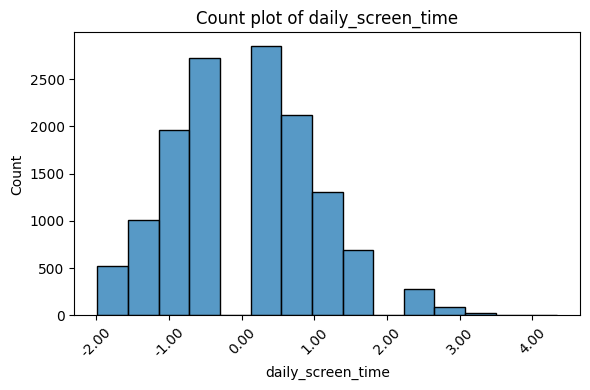

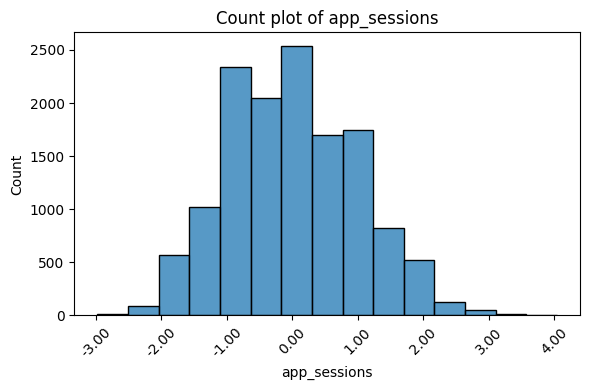

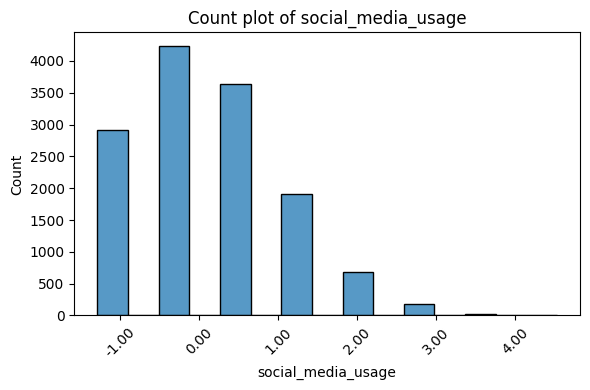

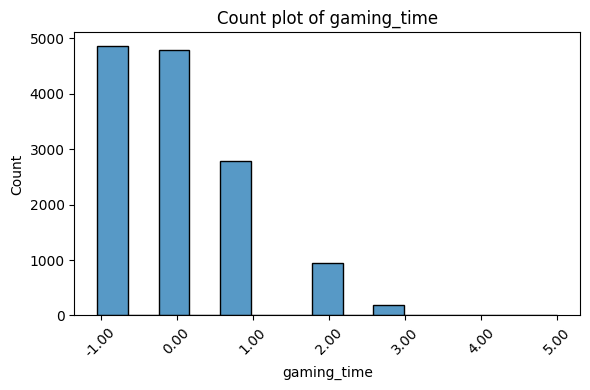

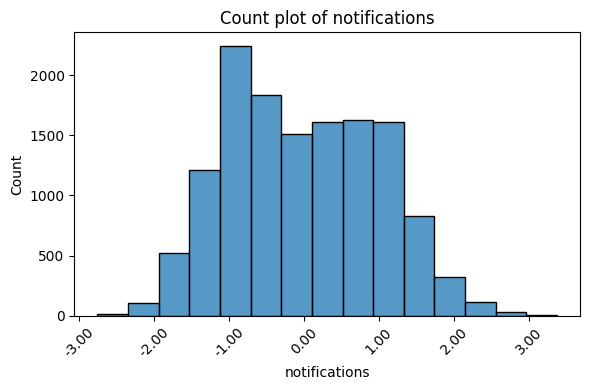

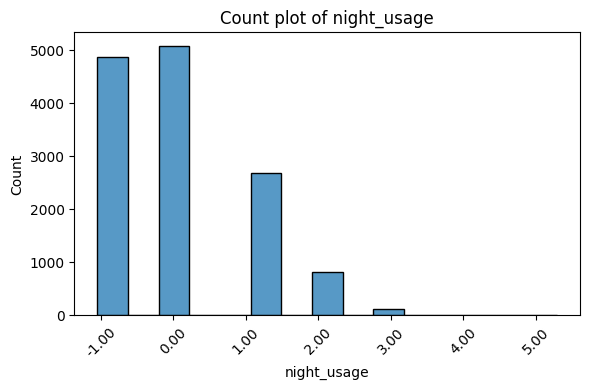

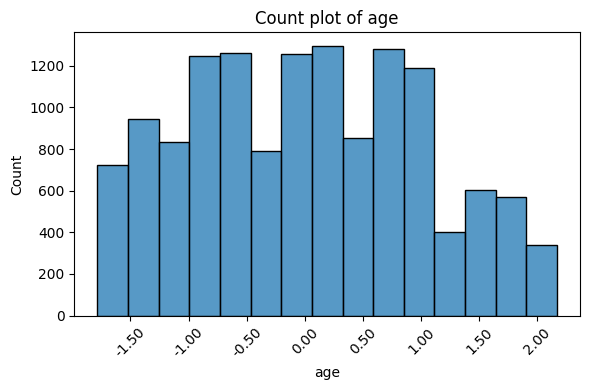

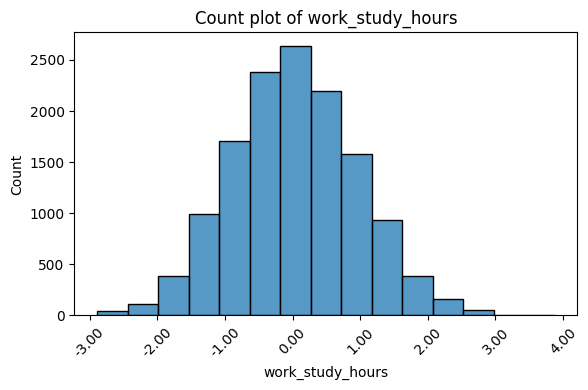

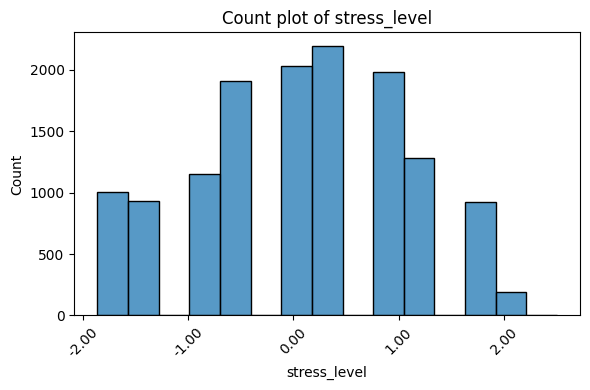

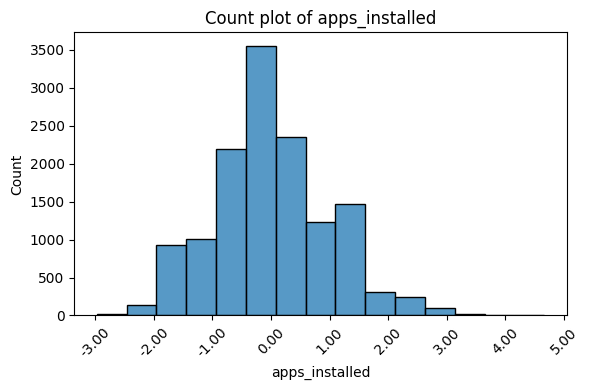

In [29]:
from matplotlib.ticker import FuncFormatter
X1_scaled_df = pd.DataFrame(X1_scaled, columns=X1.columns)

for col in X1_scaled_df.columns:
    plt.figure(figsize=(6, 4))
    
    sns.histplot(x=X1_scaled_df[col], bins=15)  # Use bins for clarity
    
    plt.title(f'Count plot of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    
    plt.gca().xaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{x:.2f}'))
    
    plt.tight_layout()
    plt.show()

Splitting

In [30]:
from sklearn.model_selection import train_test_split
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size = 0.25, random_state = 0)

X1_train.shape
y1_train.head()

2034     0
664      1
3270     1
11687    1
3974     0
Name: addicted, dtype: int64

### Classification Models

In [31]:
### We will implement grid search to see the best models available


from sklearn.model_selection import  GridSearchCV


from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier

from sklearn.metrics import accuracy_score
from sklearn.base import BaseEstimator
from sklearn.pipeline import Pipeline


class ClfSwitcher(BaseEstimator):
    def __init__(self, estimator=None):
        self.estimator = estimator

    def fit(self, X, y):
        self.estimator.fit(X, y)
        return self

    def predict(self, X):
        return self.estimator.predict(X)

    def predict_proba(self, X):
        if hasattr(self.estimator, 'predict_proba'):
            return self.estimator.predict_proba(X)
        else:
            raise AttributeError(f"The estimator {self.estimator} does not support predict_proba.")



steps = [('clf', ClfSwitcher())]
pipeline = Pipeline(steps)

models = [
    {
        'clf__estimator': [GaussianNB()]
    },

    { 
        'clf__estimator': [LogisticRegression()],
        'clf__estimator__penalty': ['l2','l1'],  # Regularization
        'clf__estimator__C': np.logspace(-4, 4, 10),  # Regularization strength
        'clf__estimator__solver': ['liblinear'],  # Solver for small datasets
    },
    {
        'clf__estimator': [DecisionTreeClassifier(max_depth=5)],
        'clf__estimator__max_depth': np.arange(5, 16),
    },
    {
        'clf__estimator': [KNeighborsClassifier()],
        'clf__estimator__n_neighbors': np.arange(5, 16, 2),
    },
    {
        'clf__estimator': [RandomForestClassifier()],
        'clf__estimator__max_depth': np.arange(5, 21),
        'clf__estimator__n_estimators': np.arange(5, 21),
    },
    {
        'clf__estimator': [XGBClassifier()],
        'clf__estimator__max_depth': np.arange(3, 15, 2),
        'clf__estimator__n_estimators': np.arange(50, 201, 50),
        'clf__estimator__learning_rate': [0.01, 0.1, 0.3],
        'clf__estimator__subsample': [0.7, 0.8, 0.9, 1.0],
    },

    {
        'clf__estimator': [SVC()],
        'clf__estimator__C': [0.1, 1, 10],
        'clf__estimator__kernel': ['linear', 'rbf']
    }
]

gscv = GridSearchCV(pipeline, cv=5, param_grid=models, scoring="accuracy",n_jobs=-1) # balanced model
gscv.fit(X1_train, y1_train)

print("Best model:", gscv.best_estimator_)
print("Best parameters:", gscv.best_params_)
print("Best cross-validation accuracy:", gscv.best_score_)




Best model: Pipeline(steps=[('clf',
                 ClfSwitcher(estimator=XGBClassifier(base_score=None,
                                                     booster=None,
                                                     callbacks=None,
                                                     colsample_bylevel=None,
                                                     colsample_bynode=None,
                                                     colsample_bytree=None,
                                                     device=None,
                                                     early_stopping_rounds=None,
                                                     enable_categorical=False,
                                                     eval_metric=None,
                                                     feature_types=None,
                                                     feature_weights=None,
                                                     gamma=None,
                   

c:\Users\salah elsayed\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\ma\core.py:2820: RuntimeWarning:

invalid value encountered in cast



In [32]:
xgb_classifier = XGBClassifier(
    learning_rate=0.1,
    max_depth=5,
    n_estimators=100,
    subsample=0.8,
    random_state=42,
)


classifier1 = ClfSwitcher(estimator=xgb_classifier)

classifier1.fit(X1_train, y1_train)
y1_pred = classifier1.predict(X1_test)

from sklearn.metrics import classification_report


print("\nClassification Report on Test Set:")
print(classification_report(y1_test, y1_pred))



Classification Report on Test Set:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1690
           1       0.98      0.98      0.98      1708

    accuracy                           0.98      3398
   macro avg       0.98      0.98      0.98      3398
weighted avg       0.98      0.98      0.98      3398



# AutoML using Tpot

In [33]:
import tpot
print(tpot.__version__)


c:\Users\salah elsayed\AppData\Local\Programs\Python\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning:

IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html



1.0.0


In [34]:
from tpot import TPOTClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score

# 1. Split your data
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.2, random_state=42)

# 2. Initialize TPOT
tpot = TPOTClassifier(
    generations=3,      
    population_size=20,
    scorers="roc_auc",
    cv=5,
    verbose=3,
    n_jobs=6
)

tpot.fit(X_train, y_train)
print(tpot.fitted_pipeline_)

y_pred = tpot.fitted_pipeline_.predict_proba(X_test)[:, 1]
print("ROC AUC:", roc_auc_score(y_test, y_pred))


c:\Users\salah elsayed\AppData\Local\Programs\Python\Python311\Lib\site-packages\tpot\tpot_estimator\estimator.py:456: UserWarning:

Both generations and max_time_mins are set. TPOT will terminate when the first condition is met.

Generation:  33%|███▎      | 1/3 [02:21<04:42, 141.42s/it]

Generation:  1
Best roc_auc_score score: 0.9978525280962363


Generation:  67%|██████▋   | 2/3 [05:13<02:39, 159.41s/it]

Generation:  2
Best roc_auc_score score: 0.9979657655873991


Generation: 100%|██████████| 3/3 [05:58<00:00, 119.62s/it]

Generation:  3
Best roc_auc_score score: 0.9979657655873991


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('variancethreshold',
                 VarianceThreshold(threshold=0.0006752204459)),
                ('featureunion-1',
                 FeatureUnion(transformer_list=[('skiptransformer',
                                                 SkipTransformer()),
                                                ('passthrough',
                                                 Passthrough())])),
                ('featureunion-2',
                 FeatureUnion(transformer_list=[('skiptransformer',
                                                 SkipTransformer()),
                                                ('passthrough',
                                                 Passthrough())])),
                ('histgradientboostingclassifier',
                 HistGradientBoostingClassifier(early_stopping=False,
                                                l2_regularization=0.0001162808461,
                                

# QSVM

In [35]:
!pip install cirq


[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [44]:
import cirq
import time
import numpy as np
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Quantum feature map: encodes 2D data into a 2-qubit quantum state
def create_feature_circuit(x):
    qubits = cirq.LineQubit.range(2)
    circuit = cirq.Circuit()
    circuit.append(cirq.rx(x[0])(qubits[0]))
    circuit.append(cirq.rz(x[1])(qubits[1]))
    circuit.append(cirq.CNOT(qubits[0], qubits[1]))
    return circuit

# Kernel computation: fidelity between two quantum states
def quantum_kernel(x1, x2):
    circuit1 = create_feature_circuit(x1)
    circuit2 = create_feature_circuit(x2)
    
    simulator = cirq.Simulator()
    result1 = simulator.simulate(circuit1)
    result2 = simulator.simulate(circuit2)

    state1 = result1.final_state_vector
    state2 = result2.final_state_vector

    return np.abs(np.dot(np.conj(state1), state2)) ** 2

# Build full kernel matrix (non-parallel version)
def build_kernel_matrix(X1, X2):
    n, m = len(X1), len(X2)
    kernel = np.zeros((n, m))

    for i in range(n):
        for j in range(m):
            kernel[i, j] = quantum_kernel(X1[i], X2[j])

    return kernel

# Sample and scale the data (ensure X1 and y1 exist beforehand)
df_sampled = df.sample(n=500, random_state=42)  # You may need to use df_sampled here
scaler = StandardScaler()
X1 = df_sampled.drop(columns='addicted')
y1 = df_sampled['addicted']
X1_scaled = scaler.fit_transform(X1)
X1_train, X1_test, y1_train, y1_test = train_test_split(X1_scaled, y1, test_size=0.2, random_state=101)
X_train = X1_train
X_test = X1_test

# Kernel matrices
start = time.time()
K_train = build_kernel_matrix(X_train, X_train)
print("Time for K_train:", time.time() - start)

K_test = build_kernel_matrix(X_test, X_train)

# Train and evaluate SVM
clf = SVC(kernel='precomputed')
clf.fit(K_train, y1_train)
y_pred = clf.predict(K_test)

print("Predictions:", y_pred)
print("Accuracy:", accuracy_score(y1_test, y_pred))


Time for K_train: 175.398508310318
Predictions: [0 0 0 0 1 1 1 0 0 0 0 0 0 0 1 1 1 0 0 0 1 1 1 1 1 1 1 0 0 1 0 1 1 0 0 0 0
 0 0 1 1 1 1 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0 1 0 1 0 0 1 0 0 0 0 0 0 0
 1 1 1 1 1 1 0 1 1 1 1 1 1 0 0 1 1 1 1 0 1 1 0 1 0 0]
Accuracy: 0.69


In [50]:
from tensorflow import keras
df_copy=df.copy()
X1 = df_copy.drop(columns='addicted')
y1 = df_sampled['addicted']
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size = 0.25, random_state = 0)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test  = scaler.transform(X_test)

ValueError: Found input variables with inconsistent numbers of samples: [13589, 500]

In [51]:
# creation
model = keras.Sequential([
    keras.layers.InputLayer(input_shape=(X_train.shape[1],)),
    keras.layers.Dense(16, activation="relu"),   
    keras.layers.Dense(8,  activation="relu"),   
    keras.layers.Dense(1,  activation="sigmoid") 
])

model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.001),
    loss="binary_crossentropy",
    metrics=["accuracy"]
)
model.summary()


c:\Users\salah elsayed\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning:

Argument `input_shape` is deprecated. Use `shape` instead.



Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 16)             │           176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 321 (1.25 KB)

 Trainable params: 321 (1.25 KB)

 Non-trainable params: 0 (0.00 B)

In [52]:
# train
history = model.fit(X_train, y_train,validation_split=0.1,epochs=50,batch_size=32,)


ValueError: Data cardinality is ambiguous. Make sure all arrays contain the same number of samples.'x' sizes: 12230
'y' sizes: 10871


In [48]:
# test
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc:.4f}")

ValueError: Data cardinality is ambiguous. Make sure all arrays contain the same number of samples.'x' sizes: 100
'y' sizes: 2718
